## 1. Defining the Question

### a) Specifying the Data Analytic Question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account

### b) Defining the Metric for Success



*   Univariate Analysis:
calculating central tendancy, measures of spread and creating visuals like histogram, barchart, boxplot and frequency table.
*   Bivariate Analysis: creating visualizations, describing the relationship between two quantitative variables and computing and interpreting the Pearson correlation coefficient.
*   Multivariate Analysis: using multiple regression analysis and applying reduction techniques to their analysis. 
*   Exploratory Data Analysis







### c) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

### d) Recording the Experimental Design

## 2. Reading the Data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Loading the Data from the source i.e. csv
# ---
# Dataset 1 url = http://bit.ly/FinancialDataset
# ---
#
finance_data = pd.read_csv('/content/Financial Dataset - 1.csv')

## 3. Checking the Data

In [0]:
# Determining the no. of records in our dataset
#
finance_data.shape

(23524, 13)

In [0]:
# Previewing the top of our dataset
#
finance_data.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
# Previewing the bottom of our dataset
# 
finance_data.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [0]:
# Checking whether each column has an appropriate datatype
#
finance_data.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 5. Tidying the Dataset

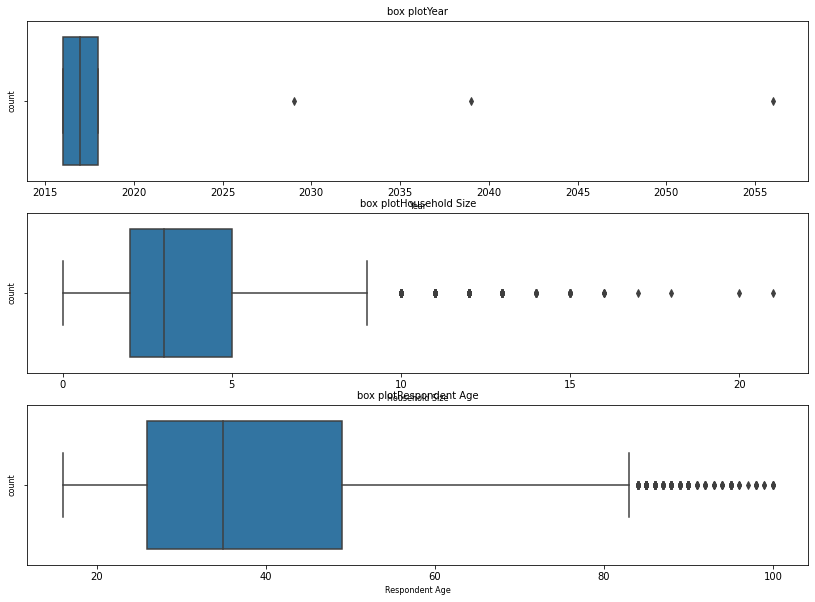

In [0]:
# Checking for Outliers
#
col_names= ['Year', 'Household Size', 'Respondent Age']
fig, ax=plt.subplots(len(col_names), figsize=(14,10))
for i, col_val in enumerate(col_names):
  sns.boxplot(finance_data[col_val], ax=ax[i])
  ax[i].set_title ('box plot'+ col_val, fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
  ax[i].set_ylabel('count', fontsize= 8)
plt.show()

In [0]:
# Checking for Anomalies
#the year contains anomalies which is useless to our dataset we remove it
year_anom = finance_data[finance_data['Year'] > 2018].index
finance_data.drop(year_anom, inplace = True)



In [0]:
# Identifying the Missing Data
#
finance_data.isnull().values.any()

True

In [0]:
# Dealing with the Missing Data
#
finance_data.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
finance_data = finance_data.dropna()

In [0]:
finance_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [0]:
# More data cleaning procedures
#
finance_data.columns.to_list()

['country',
 'year',
 'uniqueid',
 'Has a Bank account',
 'Type of Location',
 'Cell Phone Access',
 'household_size',
 'Respondent Age',
 'gender_of_respondent',
 'The relathip with head',
 'marital_status',
 'Level of Educuation',
 'Type of Job']

In [0]:
finance_data.rename(columns={'country':'Country'}, inplace = True)
finance_data.rename(columns={'year':'Year'}, inplace = True)
finance_data.rename(columns={'Has a Bank account':'Has a Bank Account'}, inplace = True)
finance_data.rename(columns={'The relathip with head':'Relationship with Head'}, inplace = True)
finance_data.rename(columns={'household_size':'Household Size'}, inplace = True)
finance_data.rename(columns={'gender_of_respondent':'Gender of Respondent'}, inplace = True)
finance_data.rename(columns={'marital_status':'Marital Status'}, inplace = True)
finance_data.columns.to_list()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


['Country',
 'Year',
 'uniqueid',
 'Has a Bank Account',
 'Type of Location',
 'Cell Phone Access',
 'Household Size',
 'Respondent Age',
 'Gender of Respondent',
 'Relationship with Head',
 'Marital Status',
 'Level of Educuation',
 'Type of Job']

## 6. Exploratory Analysis

Univariate Analysis

In [0]:
#creating a frequency table
finance_data['Has a Bank Account'].value_counts()

No     20046
Yes     3297
Name: Has a Bank Account, dtype: int64

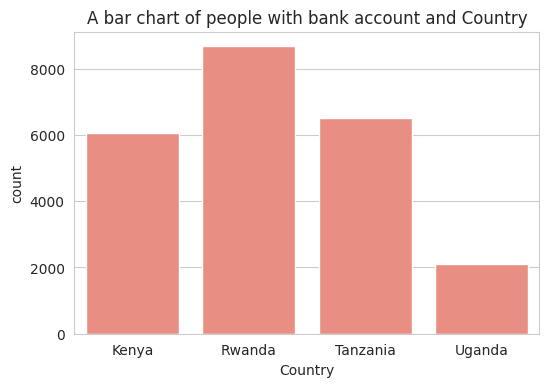

In [0]:
#creating bar chart
plt.figure(dpi = 100)
sns.set_style('whitegrid')
sns.countplot(finance_data['Country'], color="salmon")
plt.title('A bar chart of people with bank account and Country')
plt.show()

In [0]:
#creating histograms to see distribution of age and household size of people with bank accounts

Text(0.5, 1.0, 'histogram of people with bank account with their household size')

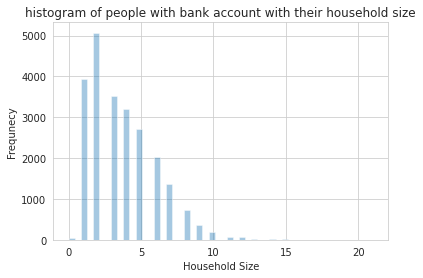

In [0]:
df = finance_data[finance_data['Has a Bank Account'] == 'Yes']
sns.distplot(finance_data['Household Size'],  kde=False, label='Yes')
plt.ylabel('Frequnecy')
plt.title('histogram of people with bank account with their household size')

Text(0.5, 1.0, 'histogram of people with bank account with their household size')

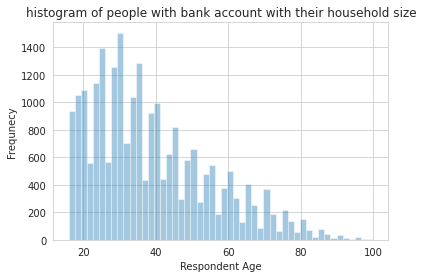

In [0]:
df = finance_data[finance_data['Has a Bank Account'] == 'Yes']
sns.distplot(finance_data['Respondent Age'],  kde=False, label='Yes')
plt.ylabel('Frequnecy')
plt.title('histogram of people with bank account with their household size')

In [0]:
finance_data.describe()

,Year,Household Size,Respondent Age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [0]:
#we find the average house hold size for people with bank accounts
finance_data['Household Size'].mean()

3.688560411311054

In [0]:
#lets see the age of most people with bank accounts
finance_data['Respondent Age'].mode()

0    30.0
dtype: float64

In [0]:
#finding the median of the years
finance_data['Year'].median()

2017.0

In [0]:
# calculating the inter quantile range
finance_data["Respondent Age"].quantile([0.25,0.5,0.75])
#which is 49-26= 23.0

0.25    26.0
0.50    35.0
0.75    49.0
Name: Respondent Age, dtype: float64

In [0]:
#finding the skewnwss of househod size
finance_data['Household Size'].skew()

0.9741827150450616

Bivariate Analysis

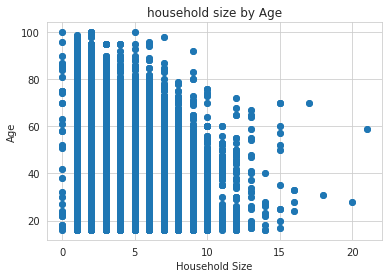

In [0]:
#creating scatter plots
finance_data.plot(x = 'Household Size', y = 'Respondent Age', kind='scatter')

plt.scatter(finance_data['Household Size'], finance_data["Respondent Age"])

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = finance_data['Household Size'], y = finance_data["Respondent Age"], fit_reg=False)

# Giving our scatterplot a title
plt.title('household size by Age')

# Labelling our x axis
plt.xlabel('Household Size')

# Labelling our y axis
plt.ylabel('Age')

# We then display our scatterplot as shown below
plt.show()

In [0]:
# Calculating the pearson coefficient
pearson_coeff = finance_data["Respondent Age"].corr(finance_data['Household Size'], method="pearson") 
print(pearson_coeff)

-0.11967115234154871


In [0]:
pearson_coeff = finance_data["Year"].corr(finance_data['Household Size'], method="pearson") 
print(pearson_coeff)

-0.05248406515317324


In [0]:
pearson_coeff = finance_data["Respondent Age"].corr(finance_data['Year'], method="pearson") 
print(pearson_coeff)

-0.01855420810674347


In [0]:
# Plotting our line graph

plt.plot(finance_data["Respondent Age"],finance_data['Household Size'])

# Giving a title to our line graph
plt.title("Age and Household size", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('age')

# Labelling the x-axis
plt.xlabel('size')

# Displaying our graph
plt.show()

Multivariate Analysis

In [0]:
# we will perfom principalcomponent analysis
X = finance_data.drop('Has a Bank Account',1)
y = finance_data['Has a Bank Account']

In [0]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA(1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array[0.23974795]


## 7. Implementing the Solution